Example-1

Importing Relevant Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_path= r"D:\ERA_ML\Data_Analytics\Dataset\week_12\Week 12 (Important data)-20220425T104714Z-001\Week 12 (Important data)\CART.xlsx"
data = pd.read_excel(file_path)

In [4]:
data

RID          age  income student credit_rating buys_computer
0     1        youth    high      no          fair            no
1     2        youth    high      no     excellent            no
2     3  middle_aged    high      no          fair           yes
3     4       senior  medium      no          fair           yes
4     5       senior    low      yes          fair           yes
5     6       senior    low      yes     excellent            no
6     7  middle_aged    low      yes     excellent           yes
7     8        youth  medium      no          fair            no
8     9        youth    low      yes          fair           yes
9    10       senior  medium     yes          fair           yes
10   11        youth  medium     yes     excellent           yes
11   12  middle_aged  medium      no     excellent           yes
12   13  middle_aged    high     yes          fair           yes
13   14       senior  medium      no     excellent            no

# Data Encoding

*****If you notice all the independent variables are categorical variable - to run a decision tree algorithm , these variables has to be transformed to numerical values***** 

We have to use label encoder and transform for this

We throw away RID , since there is no use of it . 

We split the independent variables and dependent variable (buys_computer) as usual. 

*****We cant use dummy variables here*****

In [5]:
import sklearn
# pre processing module for converting categorical value to numerical values 
from sklearn.preprocessing import LabelEncoder

In [6]:
le_age = LabelEncoder()
le_income = LabelEncoder()
le_student = LabelEncoder()
le_credit_rating = LabelEncoder()
le_buys_computer = LabelEncoder()

In [7]:
data['age_n'] = le_age.fit_transform(data['age'])
data['income_n'] = le_income.fit_transform(data['income'])
data['student_n'] = le_student.fit_transform(data['student'])
data['credit_rating_n'] = le_credit_rating.fit_transform(data['credit_rating'])
data['buys_computer_n'] = le_credit_rating.fit_transform(data['buys_computer'])

In [8]:
data.head()

RID          age  income student credit_rating buys_computer  age_n  \
0    1        youth    high      no          fair            no      2   
1    2        youth    high      no     excellent            no      2   
2    3  middle_aged    high      no          fair           yes      0   
3    4       senior  medium      no          fair           yes      1   
4    5       senior    low      yes          fair           yes      1   

   income_n  student_n  credit_rating_n  buys_computer_n  
0         0          0                1                0  
1         0          0                0                0  
2         0          0                1                1  
3         2          0                1                1  
4         1          1                1                1

In [9]:
data_new = data.drop(['age','income','student','credit_rating','buys_computer'], axis='columns')
data_new

RID  age_n  income_n  student_n  credit_rating_n  buys_computer_n
0     1      2         0          0                1                0
1     2      2         0          0                0                0
2     3      0         0          0                1                1
3     4      1         2          0                1                1
4     5      1         1          1                1                1
5     6      1         1          1                0                0
6     7      0         1          1                0                1
7     8      2         2          0                1                0
8     9      2         1          1                1                1
9    10      1         2          1                1                1
10   11      2         2          1                0                1
11   12      0         2          0                0                1
12   13      0         0          1                1                1
13   14      1         2          0                0                0

In [10]:
feature_cols = ['age_n', 'income_n', 'student_n', 'credit_rating_n']
x = data_new.drop(['buys_computer_n','RID'], axis='columns') 
#input  # Taking out RID since no use , buys_computer --> Target
y = data_new['buys_computer_n'] #target

In [11]:
x

age_n  income_n  student_n  credit_rating_n
0       2         0          0                1
1       2         0          0                0
2       0         0          0                1
3       1         2          0                1
4       1         1          1                1
5       1         1          1                0
6       0         1          1                0
7       2         2          0                1
8       2         1          1                1
9       1         2          1                1
10      2         2          1                0
11      0         2          0                0
12      0         0          1                1
13      1         2          0                0

In [12]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: buys_computer_n, dtype: int32

Building the Decision Tree Model

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
dt = clf.fit(x,y)
dt

DecisionTreeClassifier()

!pip install graphviz

!pip install pydotplus

Visualizing Decision Tree

In [14]:
!pip install graphviz

In [15]:
!pip install pydotplus

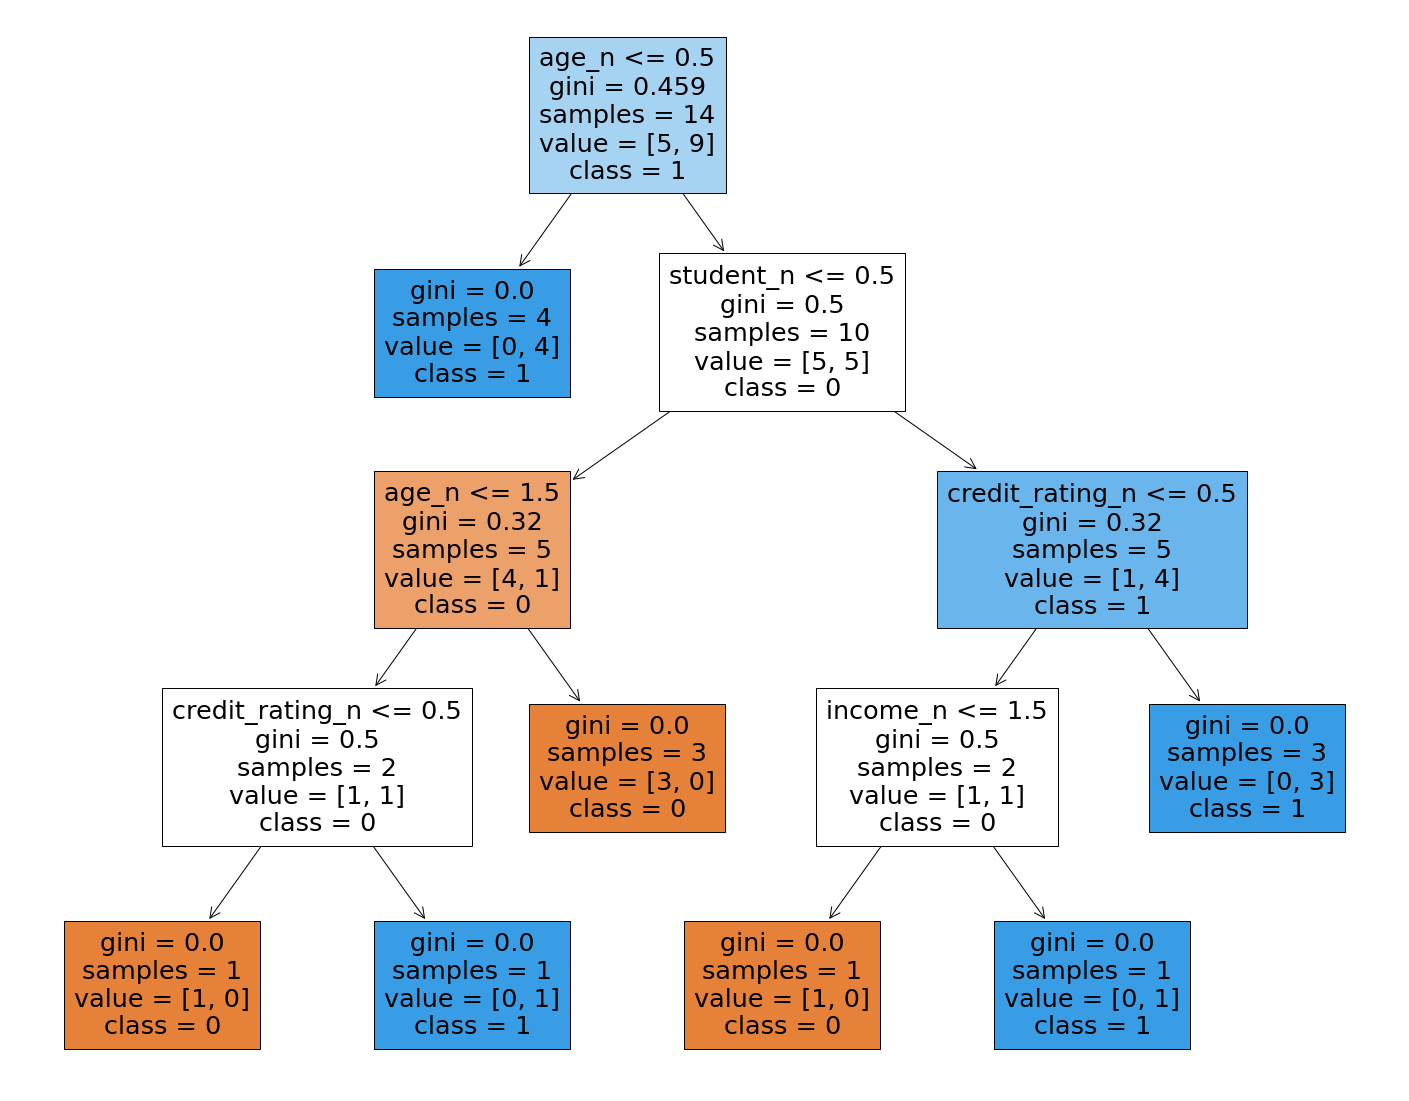

In [20]:
from sklearn import tree 
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)

# For the whole dataset 

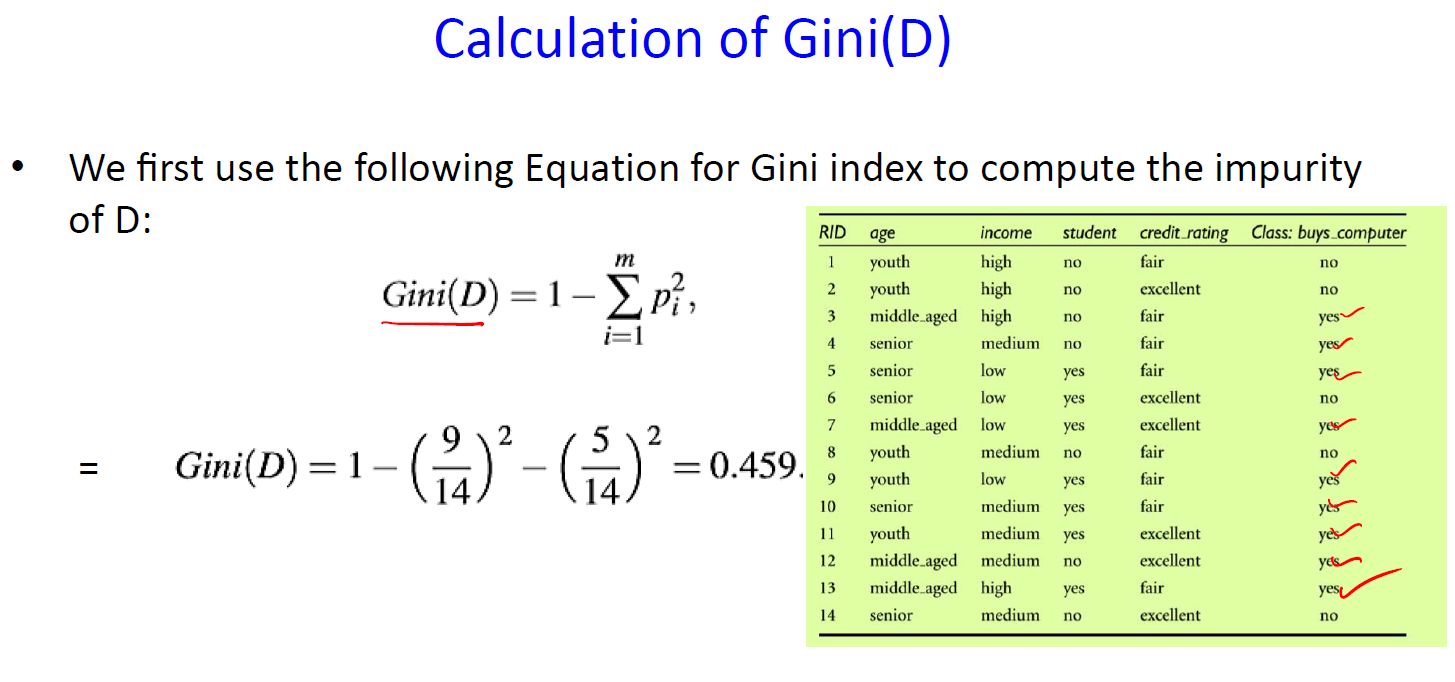


# For the attribute income : 

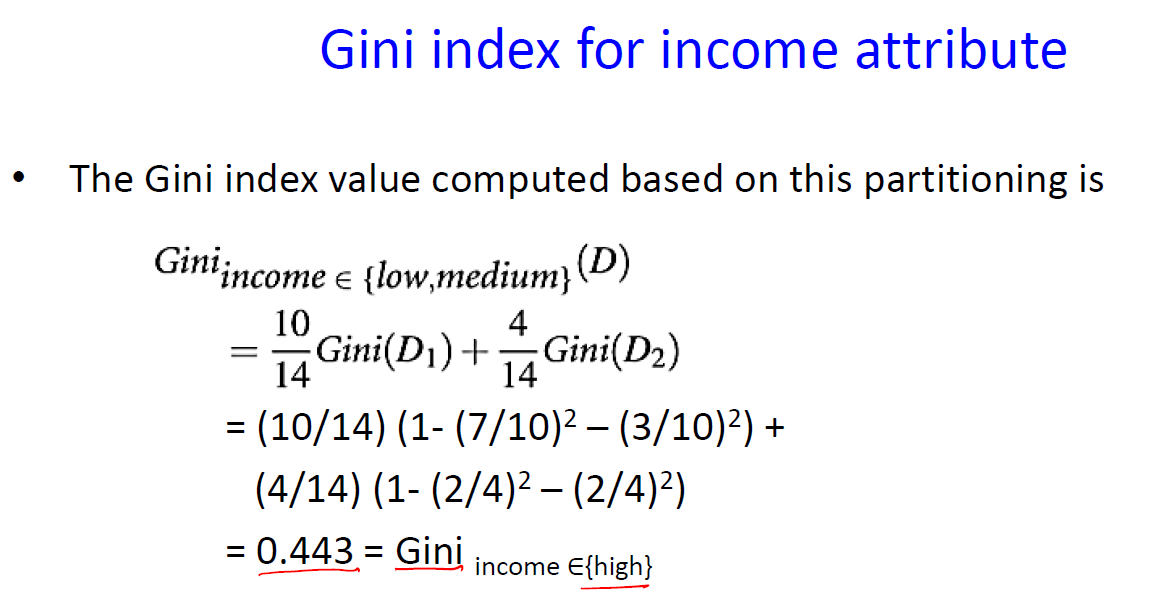

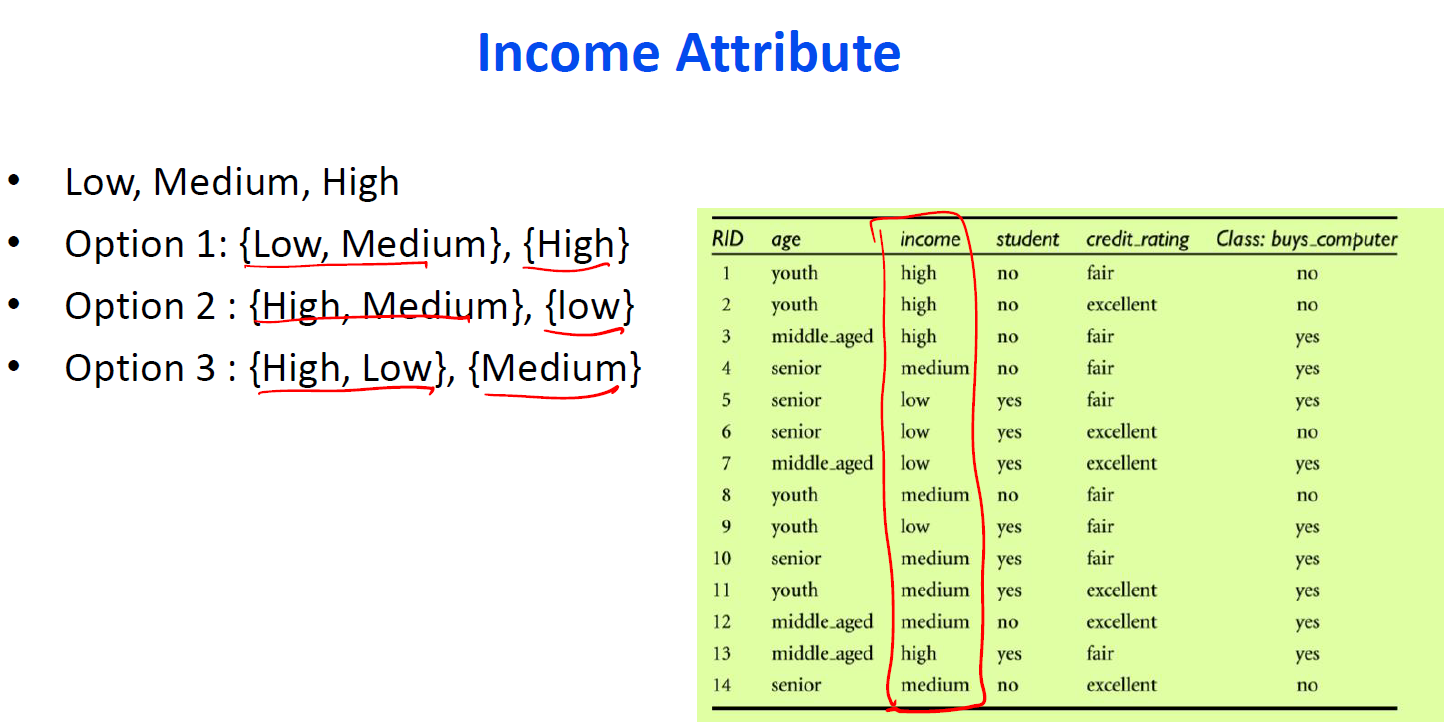

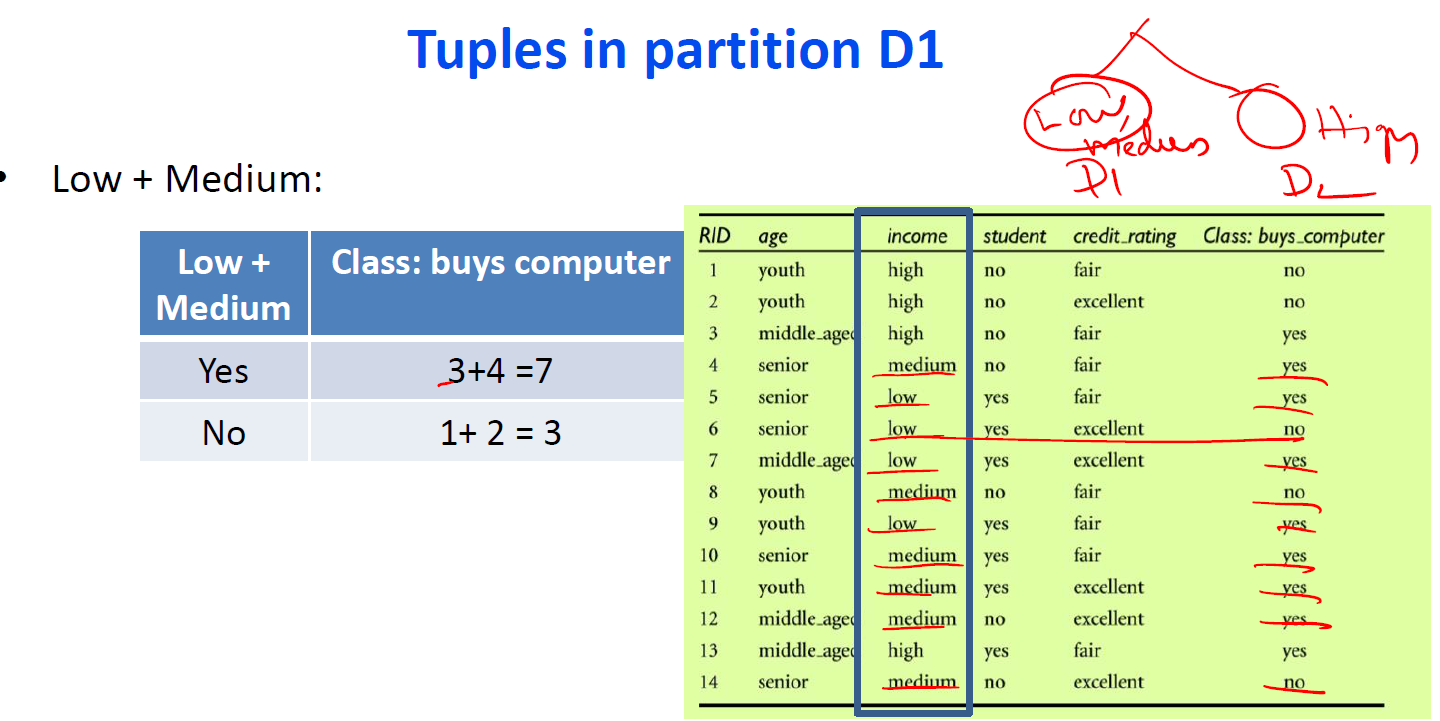

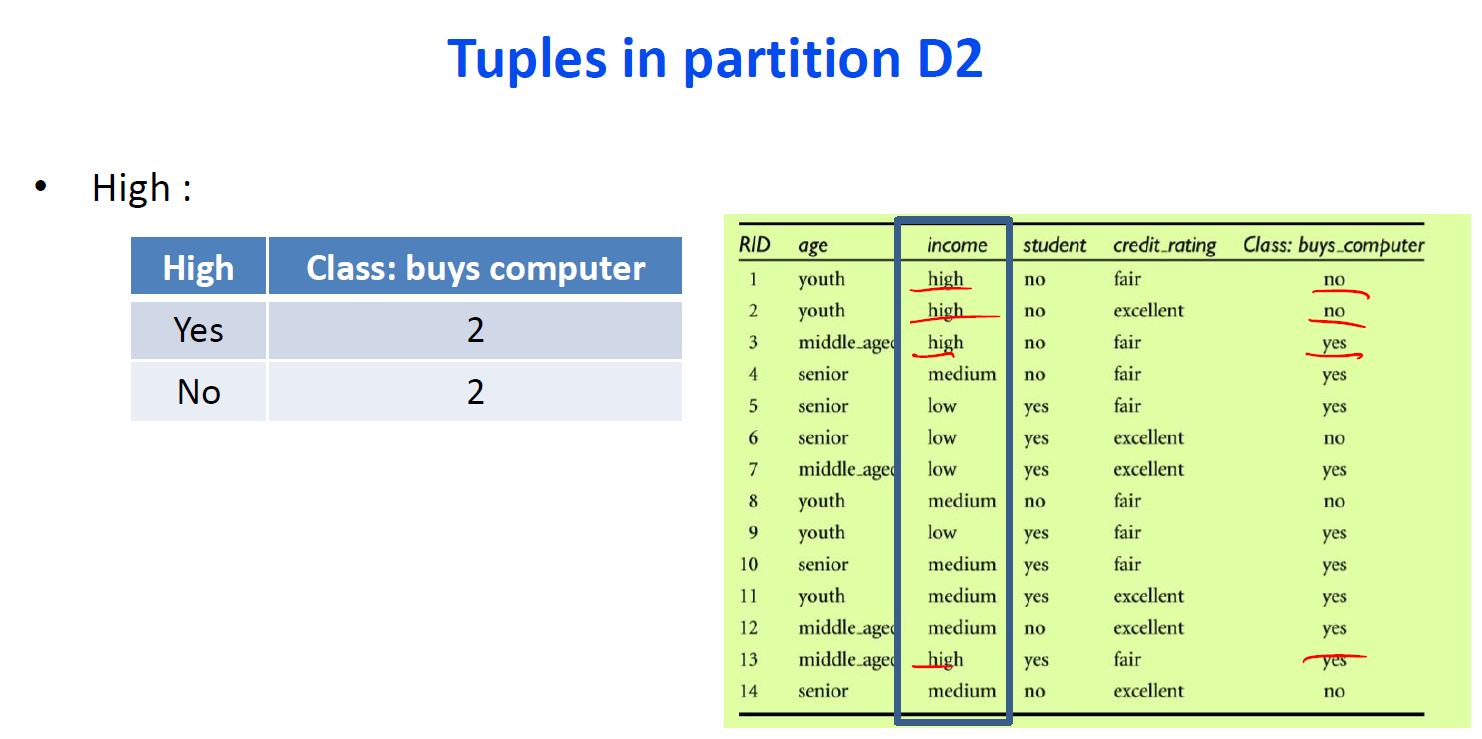

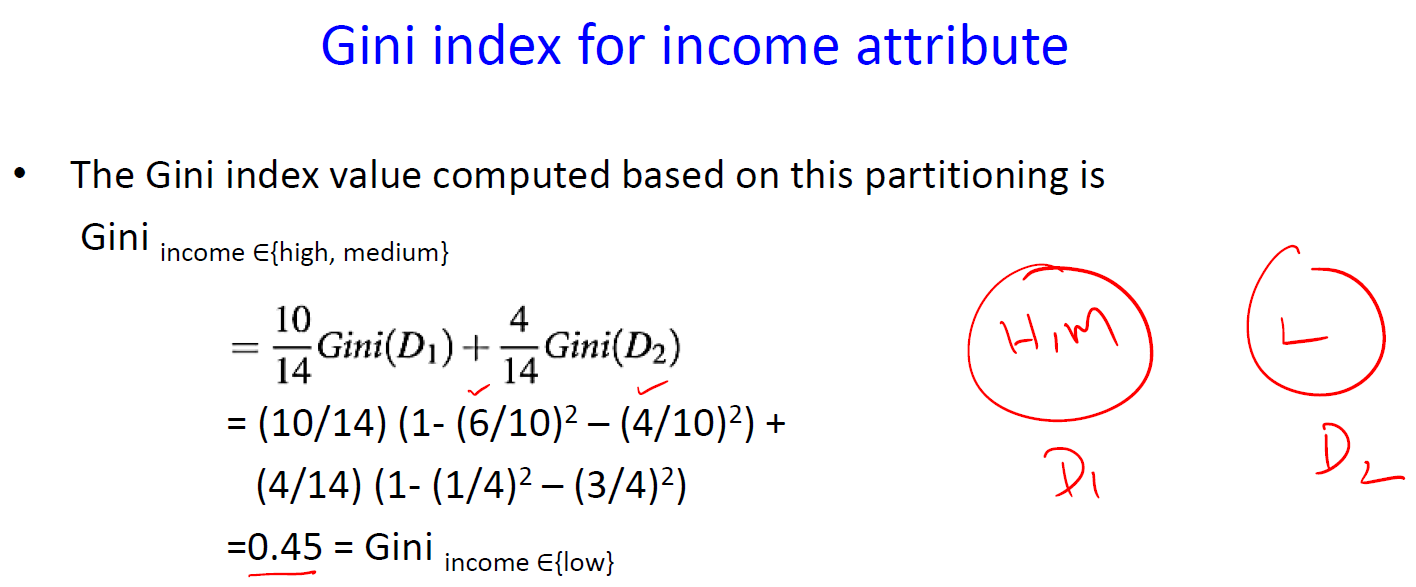

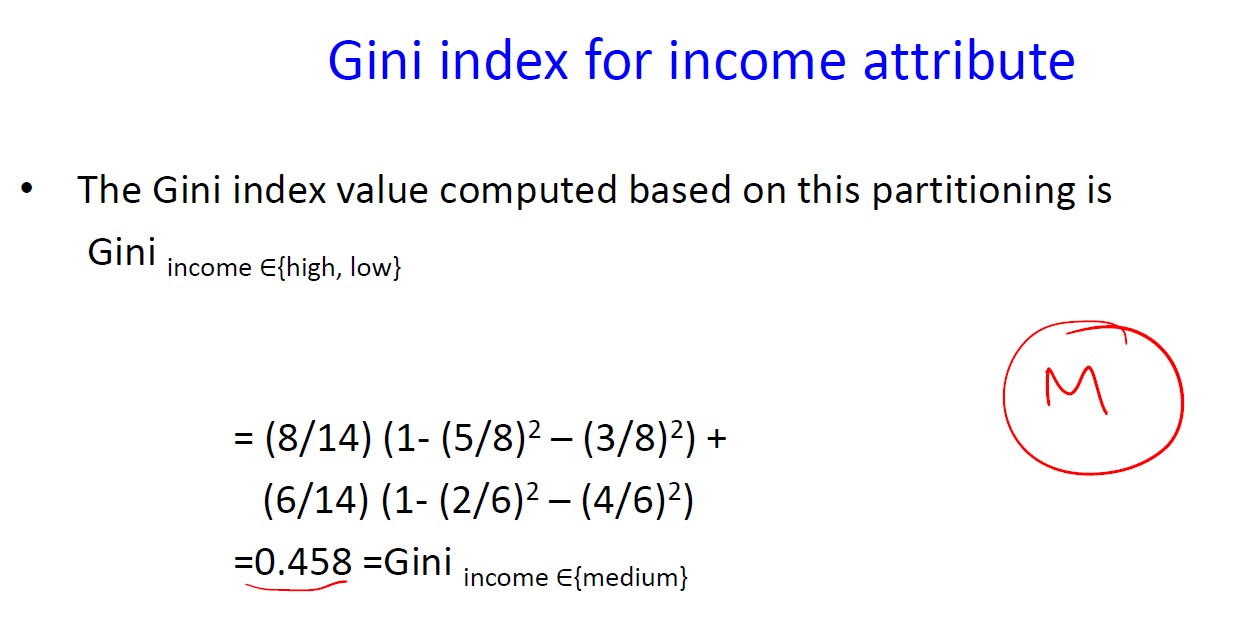

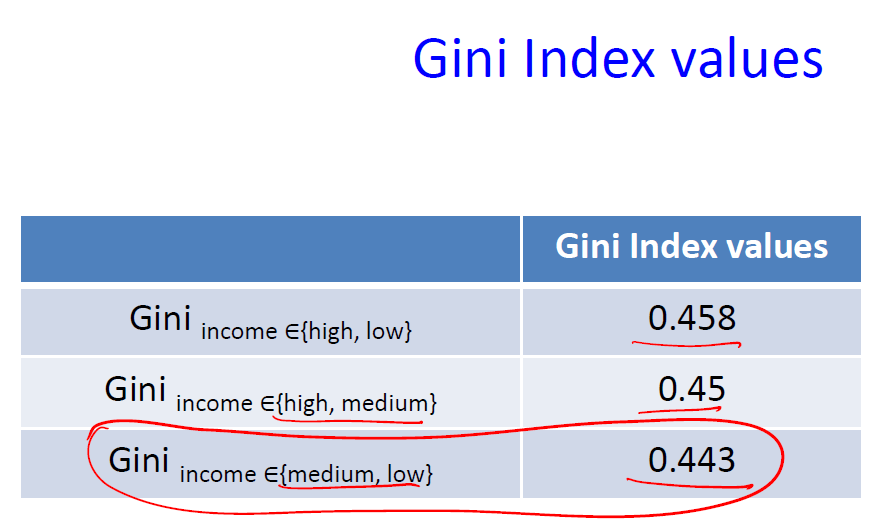

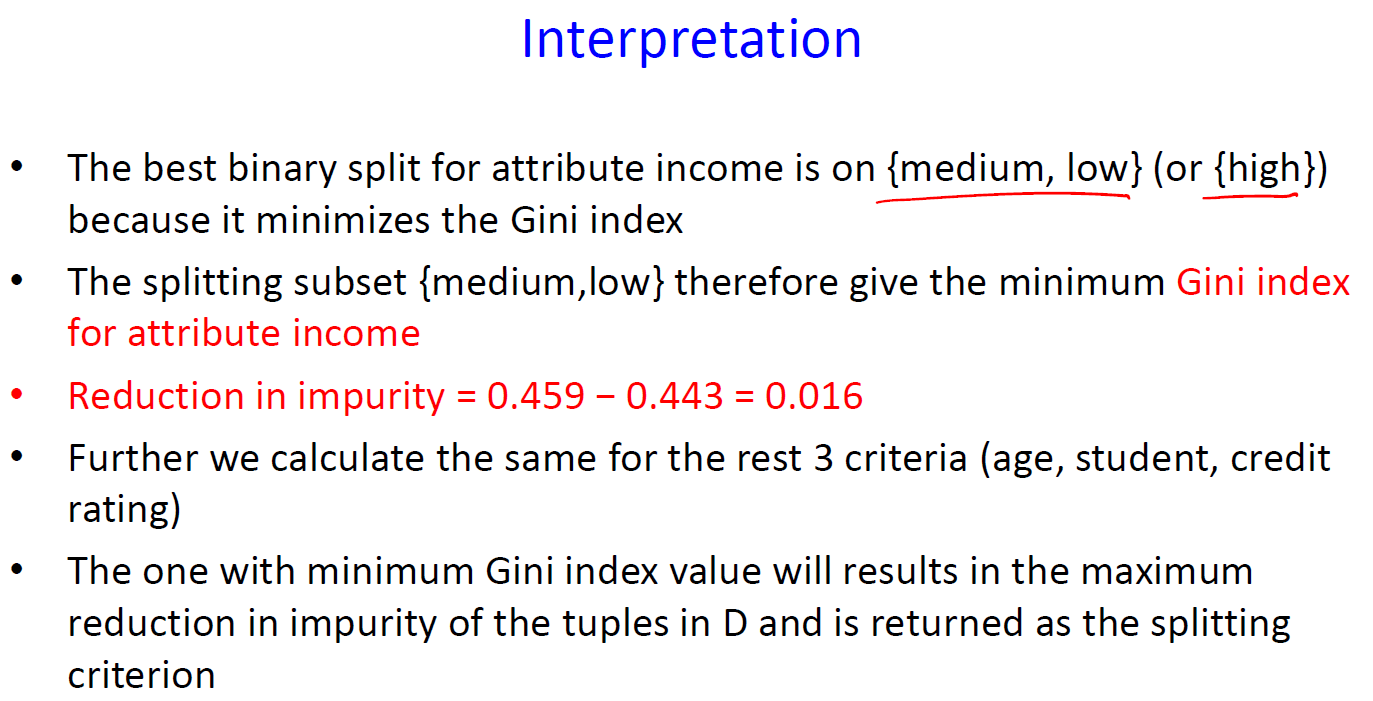

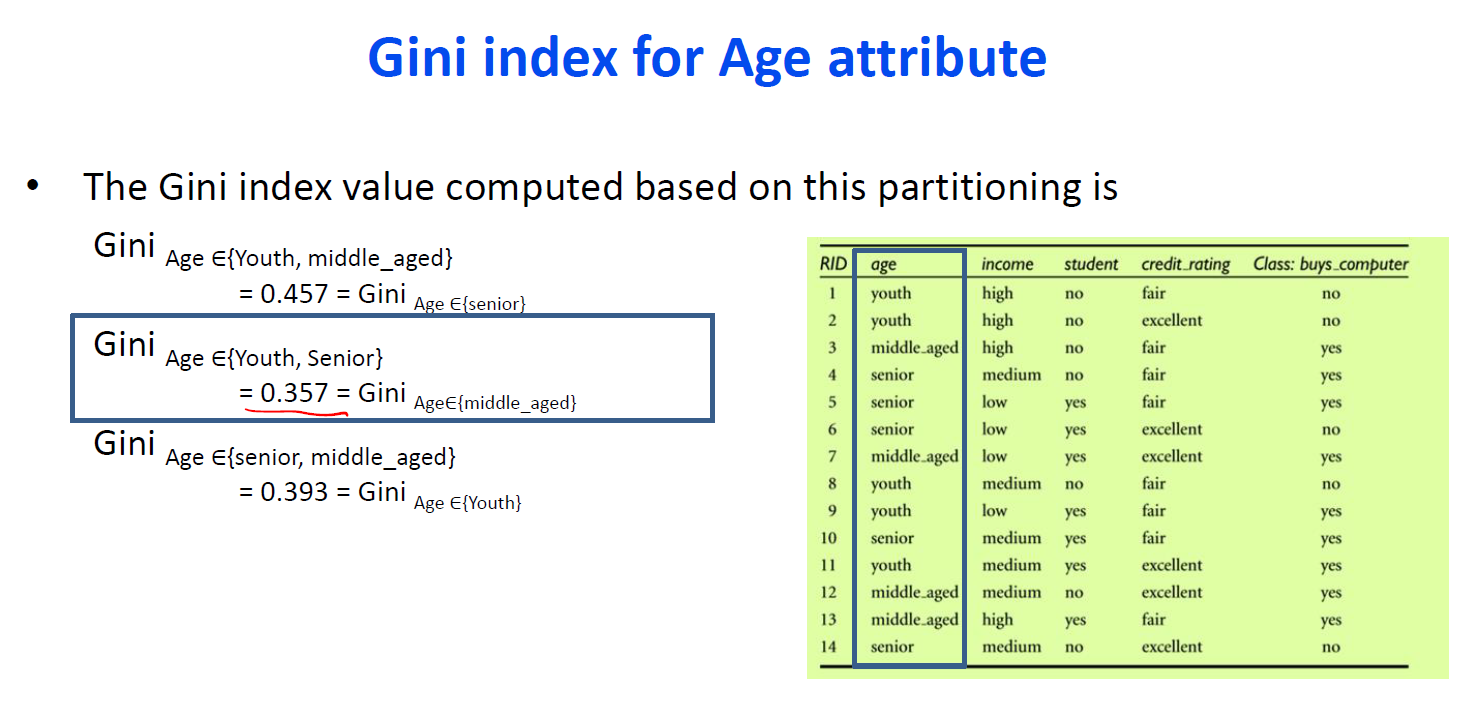

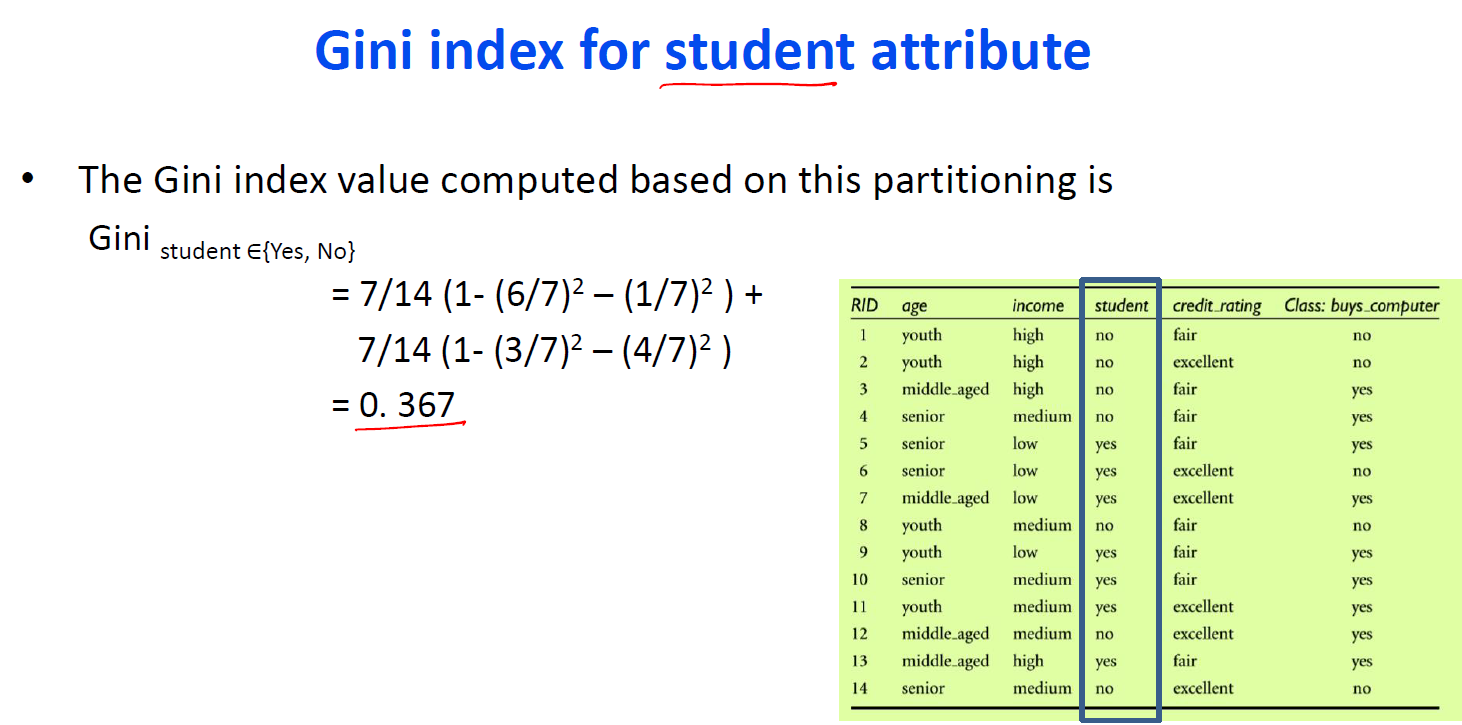

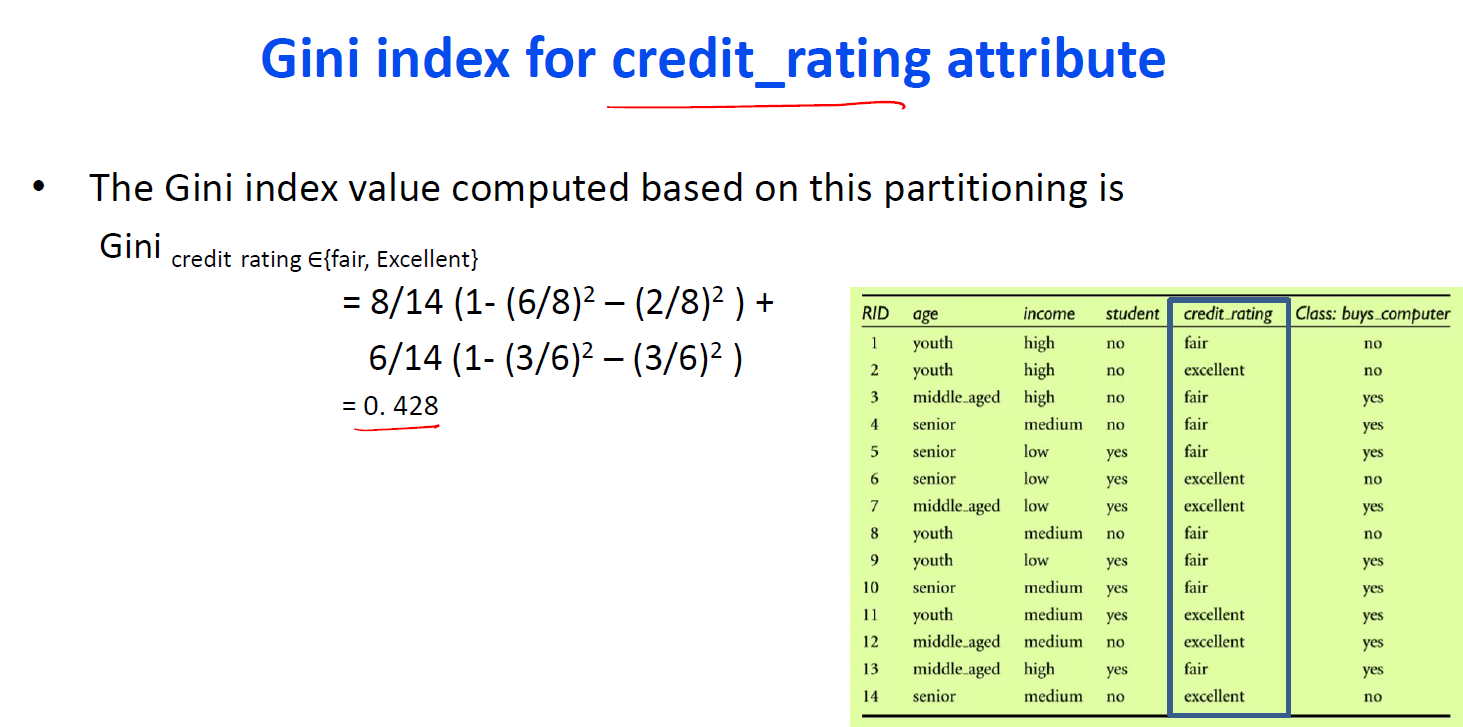

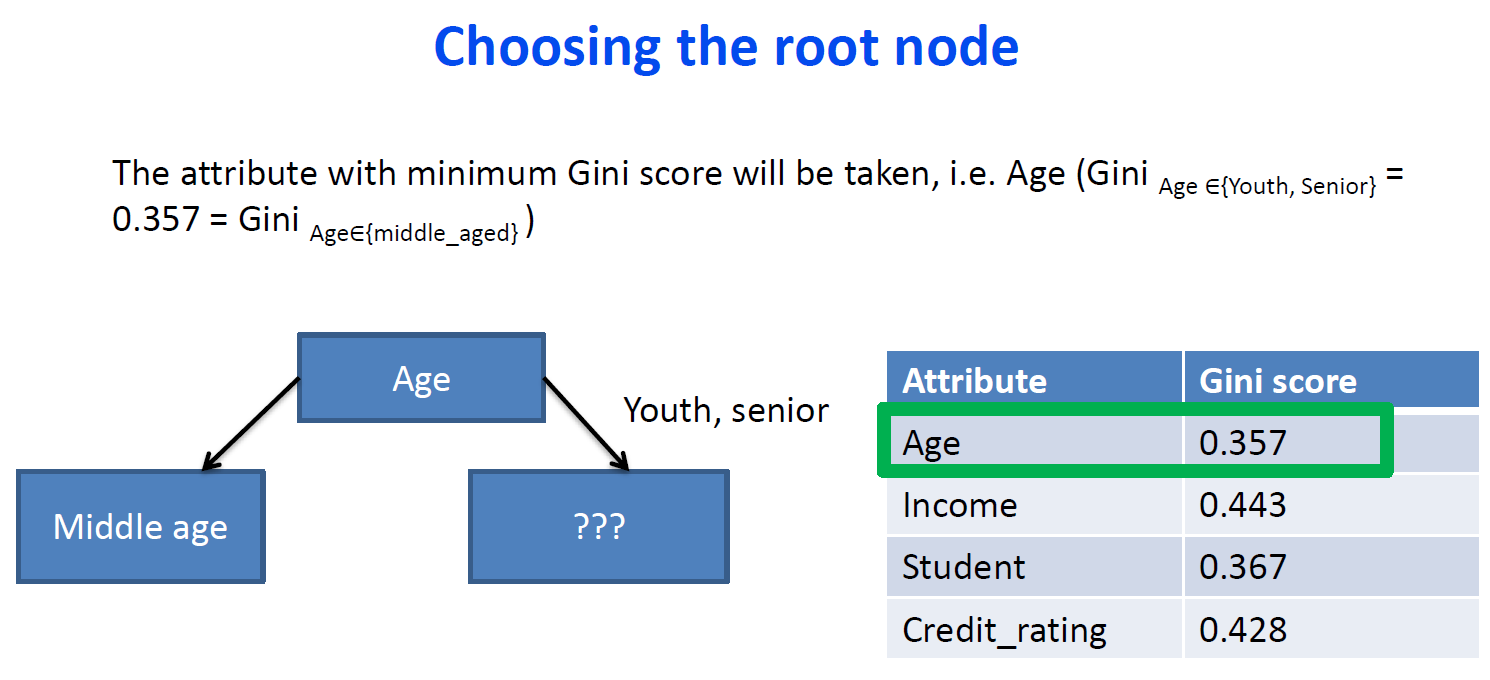

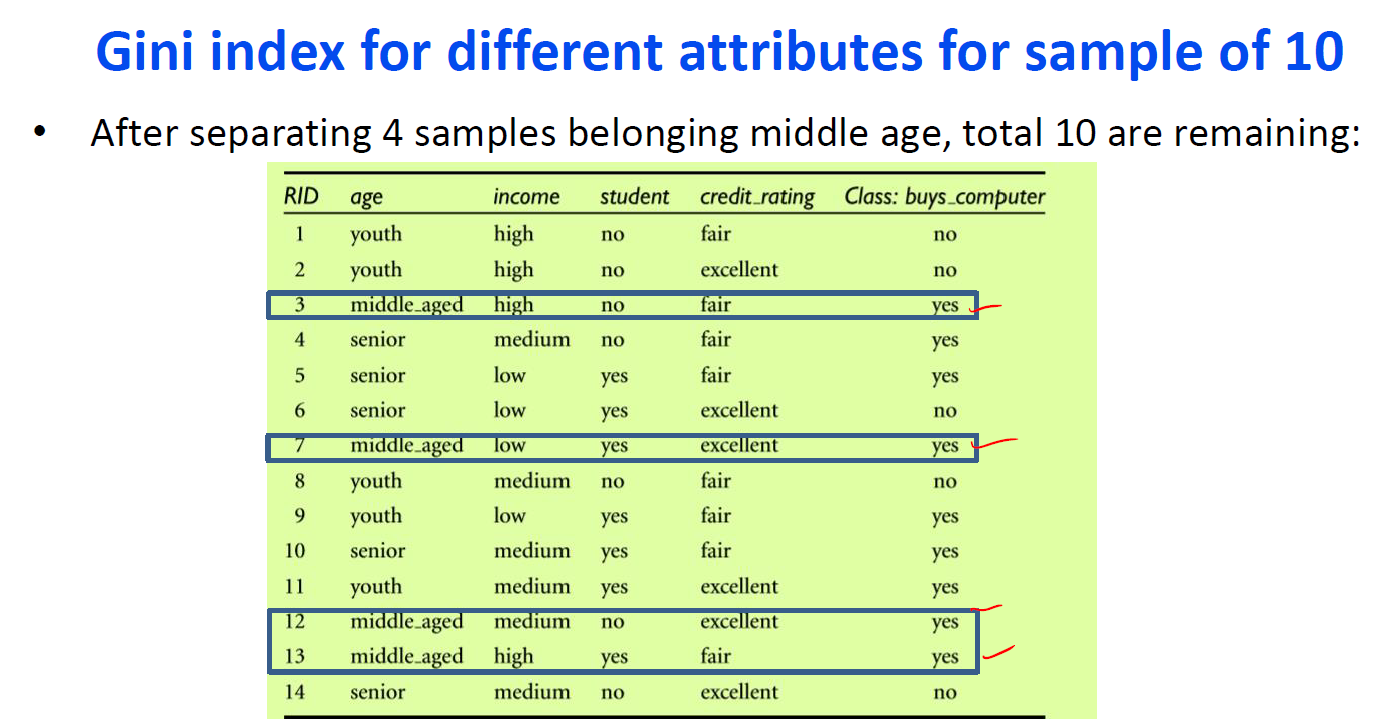

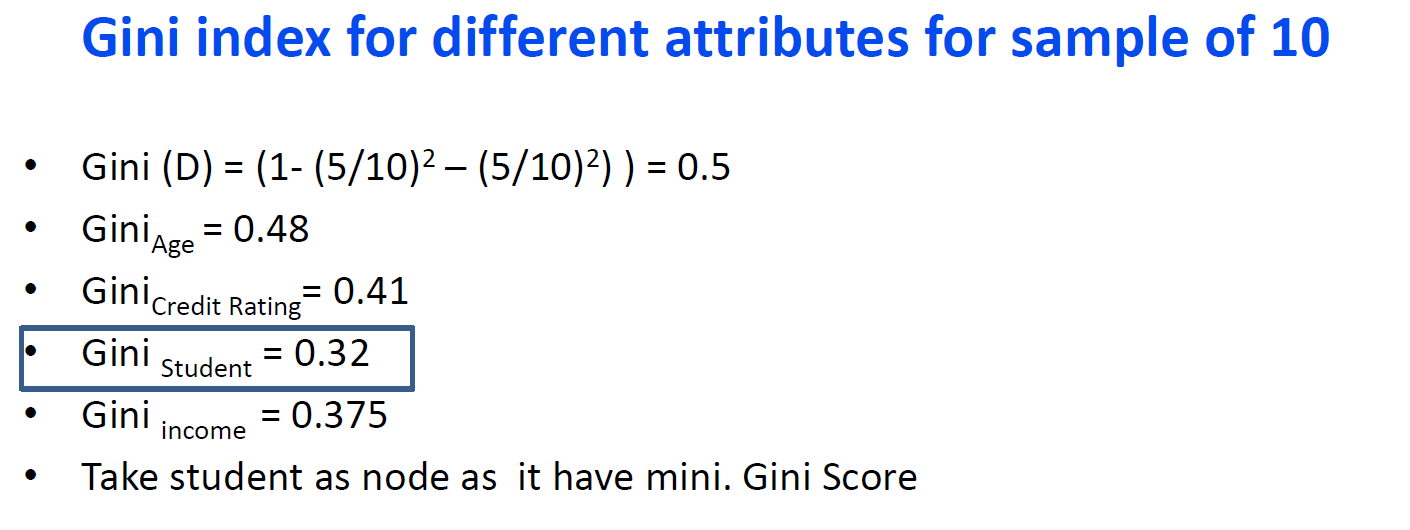

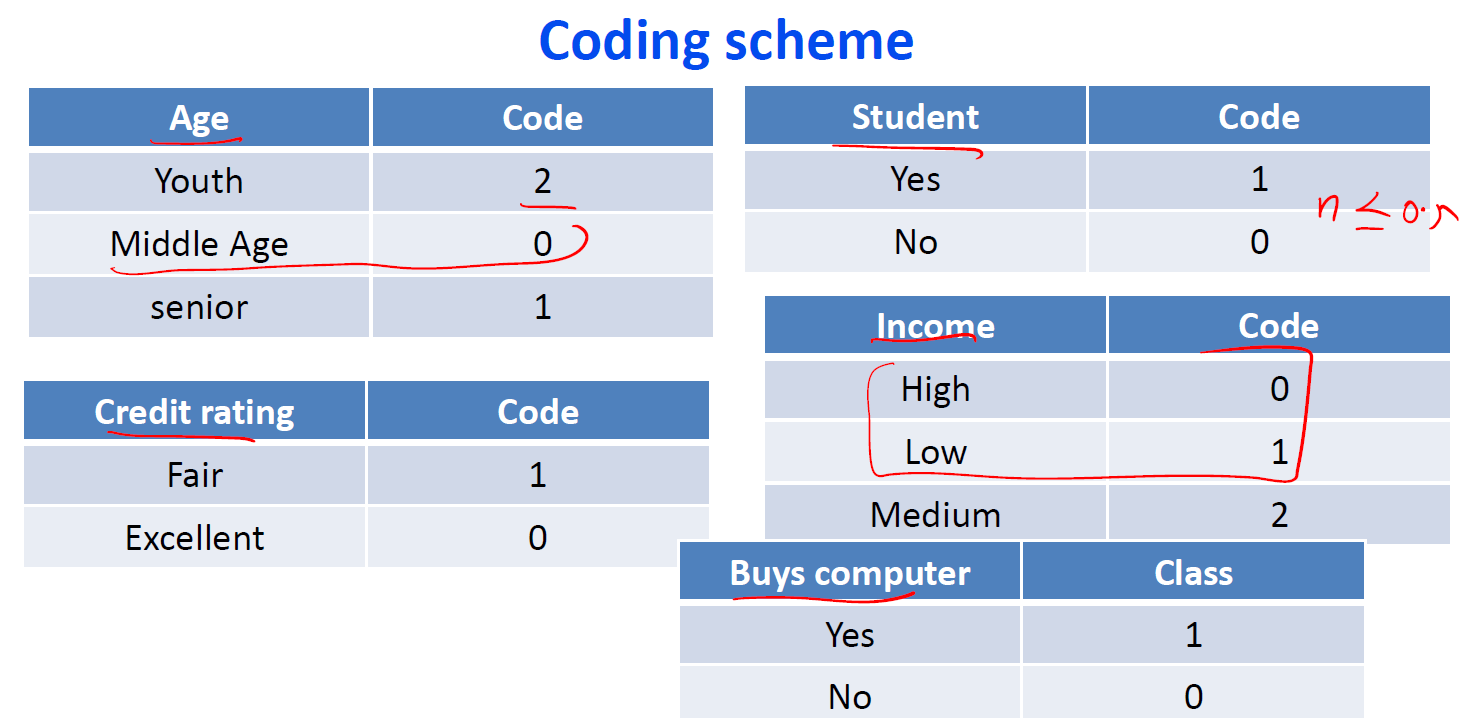

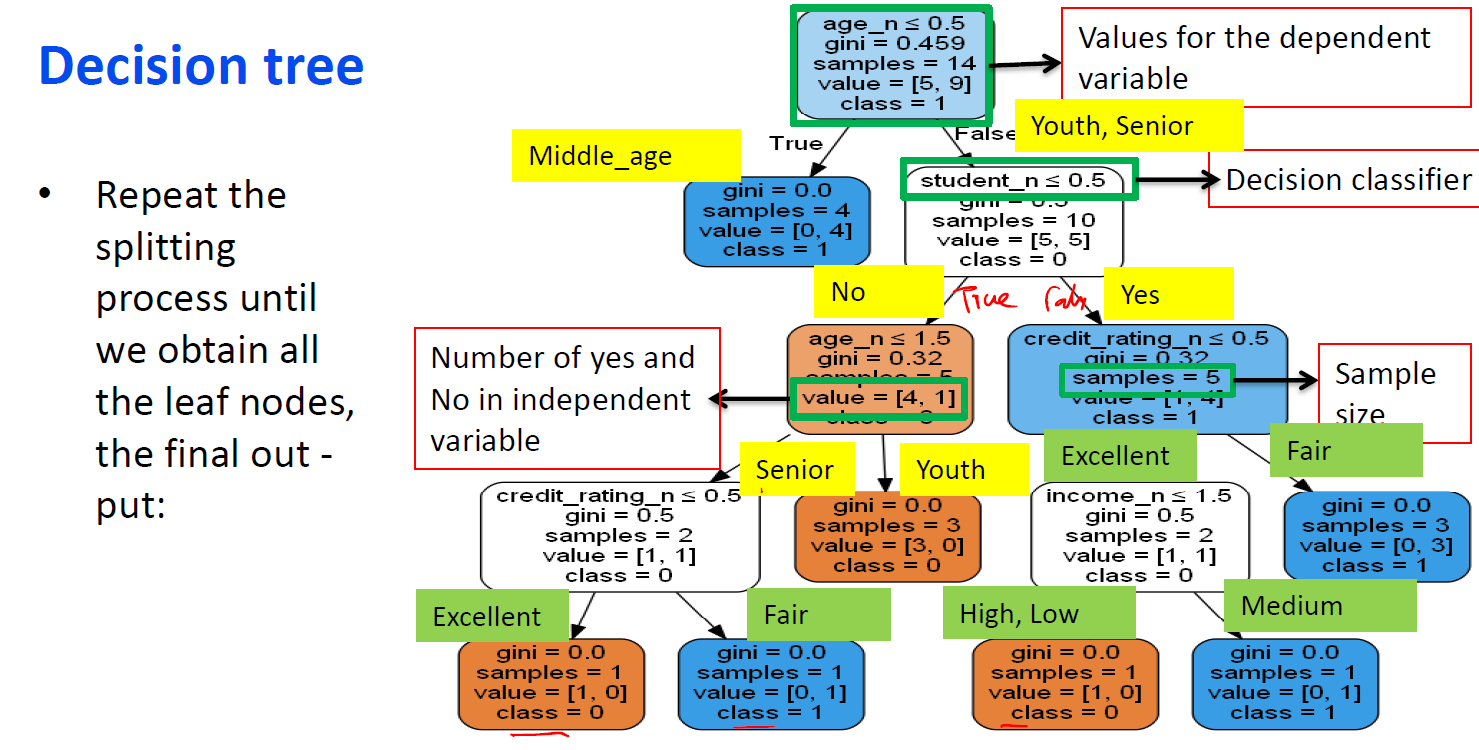


#  Splitting data set

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

### Building Decision Tree Model

In [23]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
dt = clf.fit(x_train,y_train)
dt

DecisionTreeClassifier()

In [16]:
DecisionTreeClassifier?

### Evaluating Model

In [24]:
from sklearn import metrics

In [25]:
y_pred = clf.predict(x_test)

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


### Visualizing Decision Tree

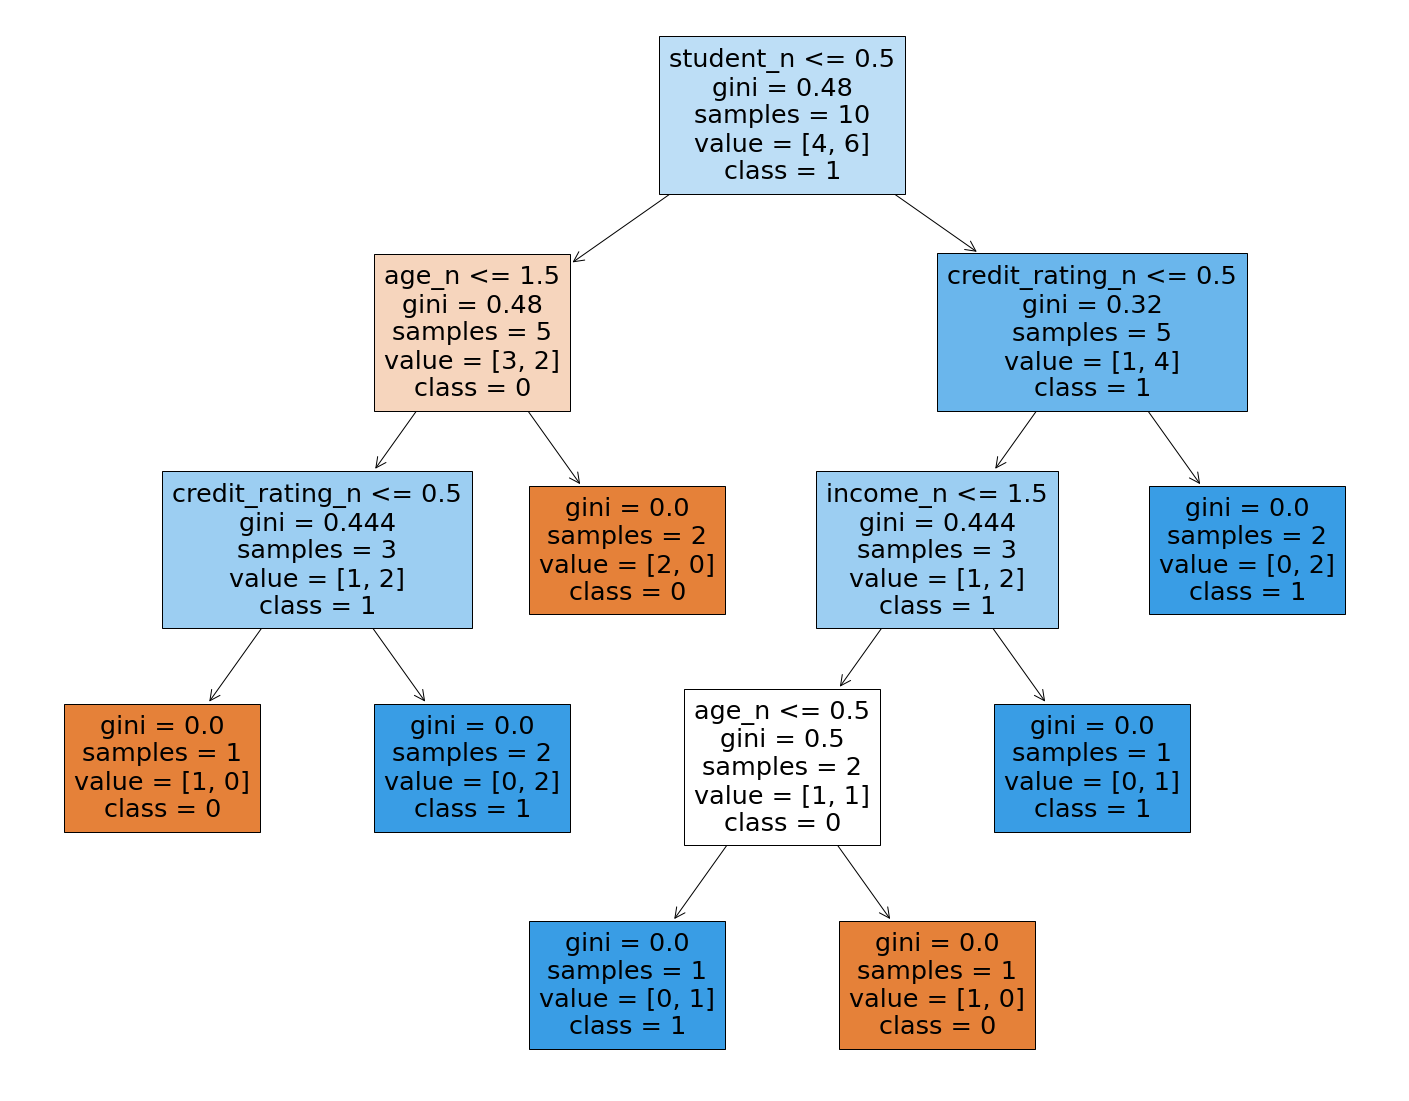

In [30]:
from sklearn import tree 
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)